For a faster computation, N should be a power of two
For a faster computation, N should be a power of two
For a faster computation, N should be a power of two
For a faster computation, N should be a power of two


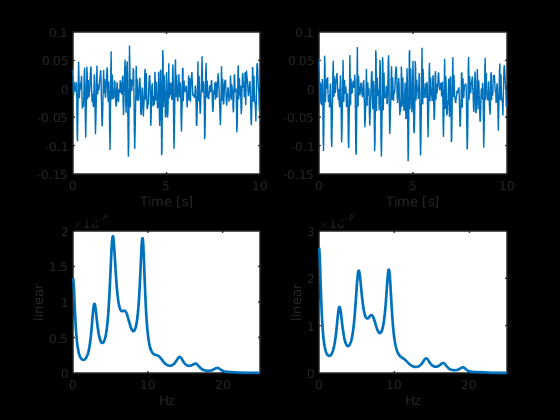

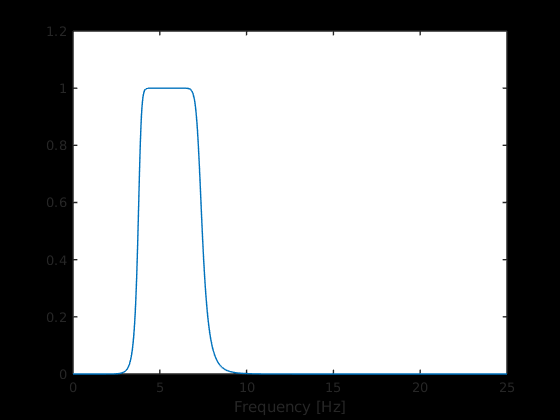

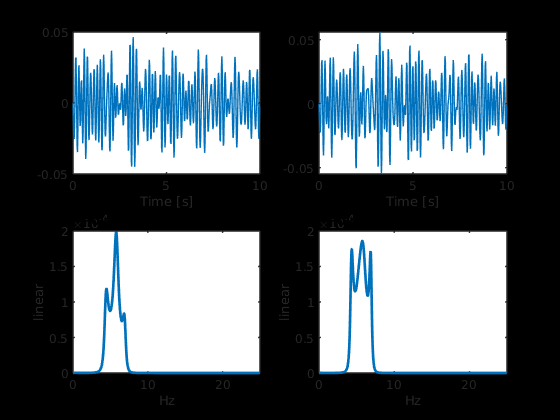

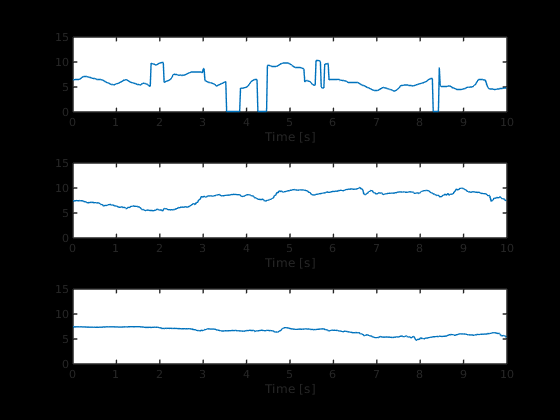

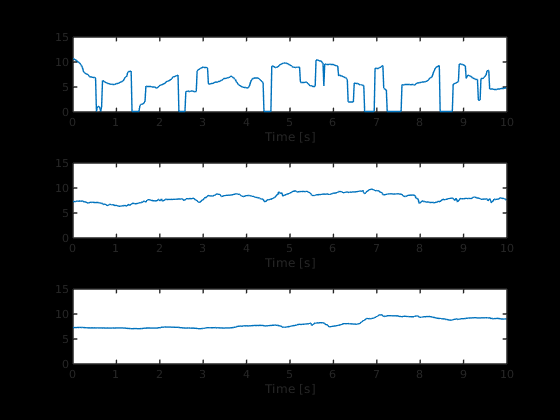

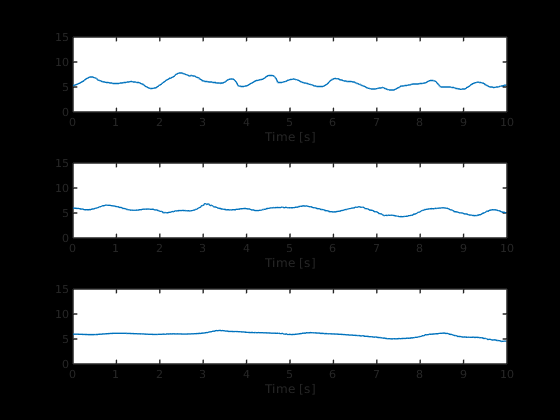

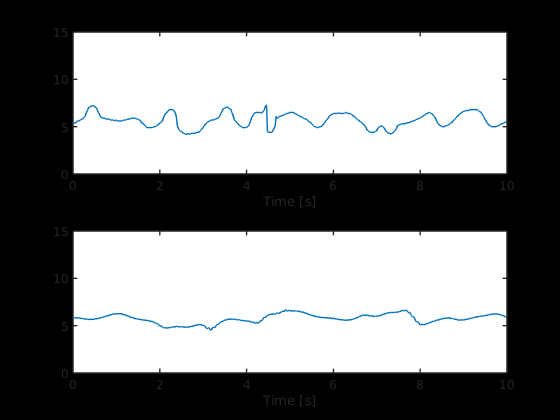

In [2]:
% --------- Experiment 1 -------------
% IF estimation form surface ECG during atrial fibrillation
close all
clear all
AA = load('AA_AFib.dat');

V3 = AA(:,9);
V4 = AA(:,10);

N = size(AA,1);
Fs = 50;

%visualize the raw signals and their PSD estimates

figure
t = (0:N-1)./Fs;
subplot(221), plot(t, V3), title('lead V3'), xlabel('Time [s]')
subplot(223), AR_psd(V3, 20, 50, 25, 0, 1);
set(gcf, 'Name', 'raw V3 signal and the PSD')


subplot(222), plot(t, V4), title('lead V4'), xlabel('Time [s]')
subplot(224), AR_psd(V4, 20, 50, 25, 0, 1);
set(gcf, 'Name', 'raw V4 signal and the PSD')


%design the IIR bandpass filter [4-7]Hz
[Nb,wn] =buttord([0.16 0.28], [0.12 0.32],0.5,20);
[b,a] = butter(Nb,wn);

%visualize the filter
% Fig. 3
figure
[h,w]=freqz(b,a,1000);
plot(Fs*linspace(0,0.5,1000),abs(h)), title('Amplitude response'), xlabel('Frequency [Hz]')
set(gcf, 'Name', 'Amplitude response of the bandpass filter')

%filter the signals
V3_filt = filtfilt(b,a,V3);
V4_filt = filtfilt(b,a,V4);

%visualize the filtered signals and their PSD estimates
figure
subplot(221), plot(t, V3_filt), title('lead V3'), xlabel('Time [s]')
subplot(223), AR_psd(V3_filt, 20, 50, 25, 0, 1);
set(gcf, 'Name', 'filtered V3 signal and the PSD')


subplot(222), plot(t, V4_filt), title('lead V4'), xlabel('Time [s]')
subplot(224), AR_psd(V4_filt, 20, 50, 25, 0, 1);
set(gcf, 'Name', 'filtered V4 signal and the PSD')

% IF estimation on raw signals
IF_STFT = STFT(V3,31,50);
[IF_Adapt_1,y] = AdaptBP(V3,5,0.85,0.9,50,0);
[IF_Adapt_2,y] = AdaptBP(V3,5,0.98,0.9,50,0);
figure
subplot(311), plot(t, IF_STFT), title('IF\_STFT on raw V3 signal'), xlabel('Time [s]'), ylim([0 15])
subplot(312), plot(t, IF_Adapt_1), title('IF\_Adapt on raw V3 signal, beta = 0.85'), xlabel('Time [s]'), ylim([0 15])
subplot(313), plot(t, IF_Adapt_2), title('IF\_Adapt on raw V3 signal, beta = 0.98'), xlabel('Time [s]'), ylim([0 15])
set(gcf, 'Name', 'IF estimation on raw V3 signal')

IF_STFT = STFT(V4,31,50);
[IF_Adapt_1, y] = AdaptBP(V4,5,0.85,0.9,50,0);
[IF_Adapt_2, y] = AdaptBP(V4,5,0.98,0.9,50,0);
figure
subplot(311), plot(t, IF_STFT), title('IF\_STFT on raw V4 signal'), xlabel('Time [s]'), ylim([0 15])
subplot(312), plot(t, IF_Adapt_1), title('IF\_Adapt on raw V4 signal, beta = 0.85'), xlabel('Time [s]'), ylim([0 15])
subplot(313), plot(t, IF_Adapt_2), title('IF\_Adapt on raw V4 signal, beta = 0.98'), xlabel('Time [s]'), ylim([0 15])
set(gcf, 'Name', 'IF estimation on raw V4 signal')

% IF estimation on filtered signals
IF_STFT = STFT(V3_filt,31,50);
[IF_Adapt_1f,y] = AdaptBP(V3_filt,5,0.85,0.9,50,0);
[IF_Adapt_2f,y] = AdaptBP(V3_filt,5,0.98,0.9,50,0);
figure
subplot(311), plot(t, IF_STFT), title('IF\_STFT on filtered V3 signal'), xlabel('Time [s]'), ylim([0 15])
subplot(312), plot(t, IF_Adapt_1f), title('IF\_Adapt on filtered V3 signal, beta = 0.85'), xlabel('Time [s]'), ylim([0 15])
subplot(313), plot(t, IF_Adapt_2f), title('IF\_Adapt on filtered V3 signal, beta = 0.98'), xlabel('Time [s]'), ylim([0 15])
set(gcf, 'Name', 'IF estimation on filtered V3 signal')

IF_STFT = STFT(V4_filt,31,50);
[IF_Adapt,y] = AdaptBP(V4_filt,4,0.95,0.9,50,0);
figure
subplot(211), plot(t, IF_STFT), title('IF\_STFT on filtered V4 signal'), xlabel('Time [s]'), ylim([0 15])
subplot(212), plot(t, IF_Adapt), title('IF\_Adapt on filtered V4 signal'), xlabel('Time [s]'), ylim([0 15])
set(gcf, 'Name', 'IF estimation on filtered V4 signal')

%%

For a faster computation, N should be a power of two


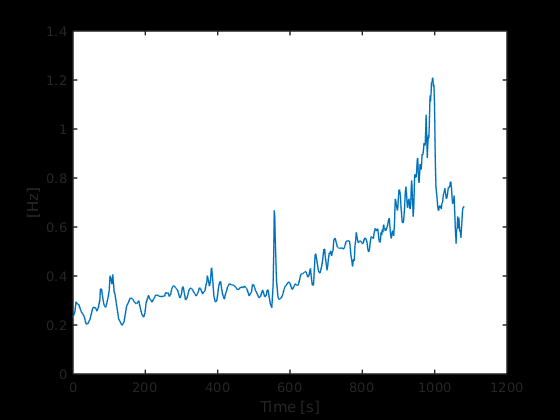

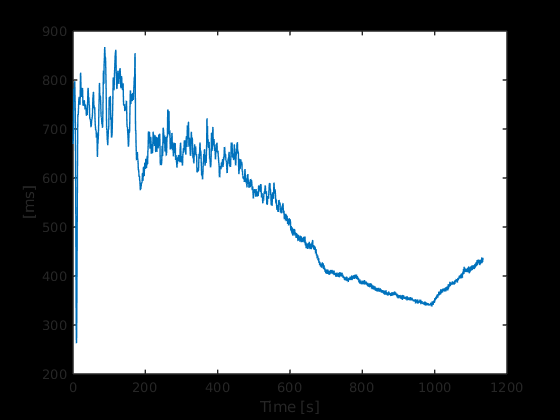

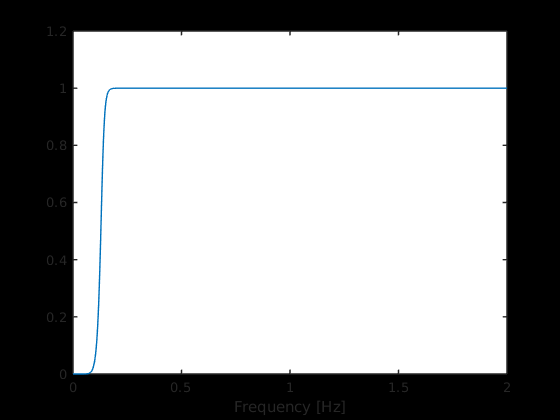

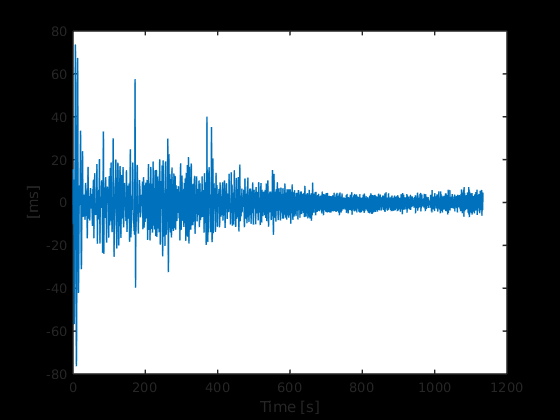

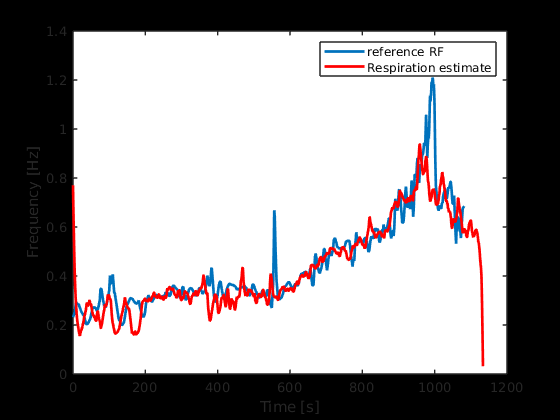

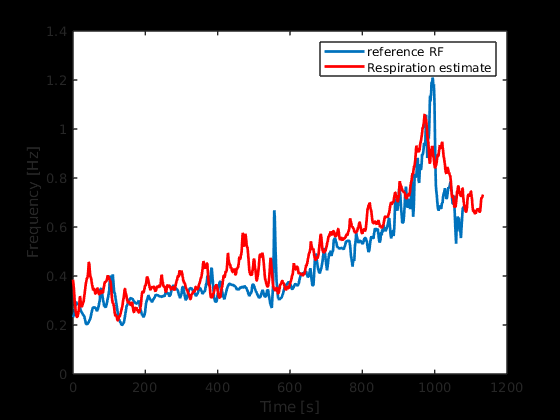

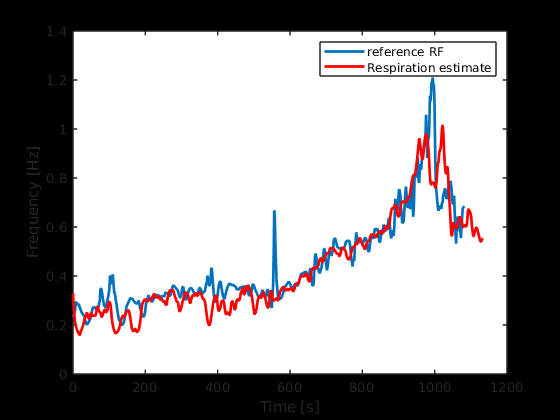

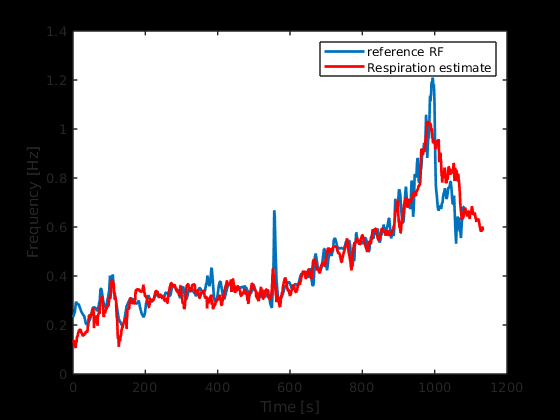

In [3]:
% --------- Experiment 2 -------------
% estimation of respiration frequency from respiration sinus arrhythmia during a VO2-max test

close all
clear all
load('VO2max.mat')

%visualize the signals
figure, plot(tr, RF), title('Respiratory frequency'), ylabel('[Hz]'), xlabel('Time [s]')
figure, plot(t, RR), title('RR-intervals'), ylabel('[ms]'), xlabel('Time [s]')

% high-pass IIR filter to remove the low-frequency components (<0.15Hz) in the RR signal
[N,Wn] = buttord(2*0.12/4,2*0.17/4,0.5,20) ;
[b,a] = butter(N,Wn,'high') ;
figure
[h,w]=freqz(b,a,1000);
plot(4.*linspace(0,0.5,1000),abs(h)), title('Amplitude response'), xlabel('Frequency [Hz]')
set(gcf, 'Name', 'Amplitude response of the high-pass filter')

% extract the respiration component from the RR-intervals
Resp = filtfilt(b,a,RR-RR(1));
figure, plot(t, Resp), title('Respiration'), ylabel('[ms]'), xlabel('Time [s]')

%IF estimation using Hilbert transform
figure
IF = IFhilbert(Resp,4);
a=0.05;
IFf = filtfilt(a,[1 a-1],IF);
plot(tr,RF,t,IFf,'r','LineWidth',2), legend('reference RF', 'Respiration estimate')
title('Hilbert')
set(gcf, 'Name', 'RF estimation using Hilbert transform')
xlabel('Time [s]')
ylabel('Frequency [Hz]')

%IF estimation using Teager energy operator
figure
[IF,env] = teager(Resp,4);
a=0.05;
IFf = filtfilt(a,[1 a-1],IF);
plot(tr,RF,t,IFf,'r','LineWidth',2), legend('reference RF', 'Respiration estimate')
title('Teager')
set(gcf, 'Name', 'RF estimation using Teager energy operator')
xlabel('Time [s]')
ylabel('Frequency [Hz]')

%IF estimation using STFT
figure
IF = STFT(Resp, 31, 4);
a=0.05;
IFf = filtfilt(a,[1 a-1],IF);
plot(tr,RF,t,IFf,'r','LineWidth',2), legend('reference RF', 'Respiration estimate')
title('STFT')
set(gcf, 'Name', 'RF estimation using STFT')
xlabel('Time [s]')
ylabel('Frequency [Hz]')

%IF estimation using adaptative IF tracking
%The best estimate seems to be obtained with the adaptive bandpass filter 
%(note that no lowpass filtering of the estimate is needed).
figure
[IF, y] = AdaptBP(Resp,0.25,0.925,0.925,4,0);
plot(tr,RF,t,IF,'r','LineWidth',2), legend('reference RF', 'Respiration estimate')
title('Adaptive BP')
set(gcf, 'Name', 'RF estimation using adaptative IF tracking')
xlabel('Time [s]')
ylabel('Frequency [Hz]')

%%

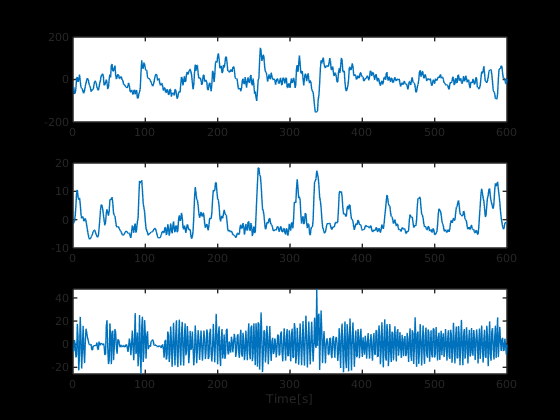

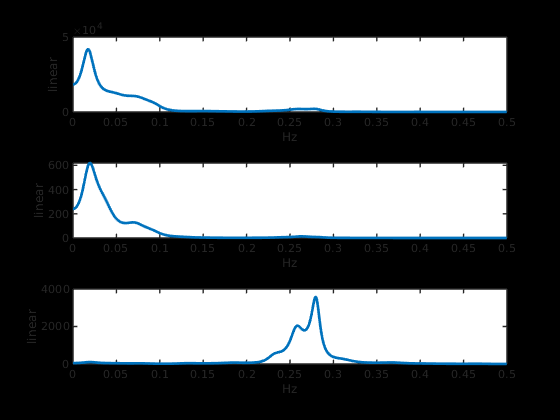

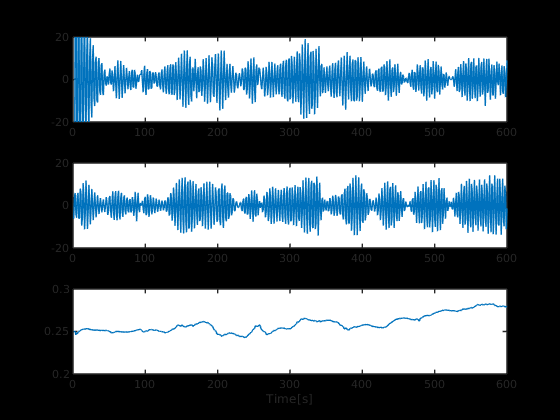

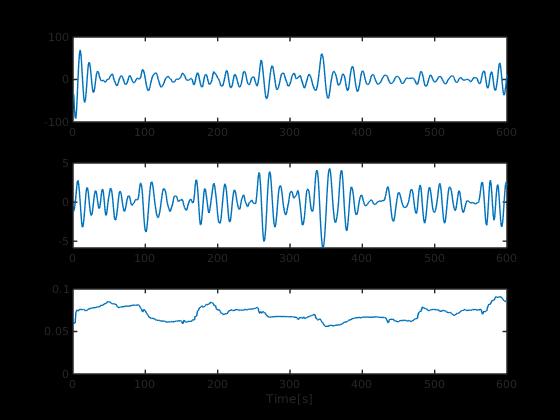

In [4]:
% --------- Experiment 3 -------------
% extraction of a common oscillation and estimation of its instantaneous frequency using bandpass adaptive filtering
close all
clear all
load('heart_3.dat');

X = heart_3;
X = X - ones(length(X), 1) * mean(X);
X = resample(X,1,4);

RR = X(:,1);
BP = X(:,2);
Resp = X(:,3);

% %remove the mean and resample at 1Hz
% 
%  RR = resample(RR-mean(RR), 1, 4);
%  BP = resample(BP-mean(BP), 1, 4);
%  Resp = resample(Resp-mean(Resp), 1, 4);

% RR = RR-mean(RR);
% BP = BP-mean(BP);
% Resp = Resp-mean(Resp);

%visualize the signals
figure
subplot(311), plot(RR), title('RR intervals')
subplot(312), plot(BP), title('Blood preasure')
subplot(313), plot(Resp), title('Respiration'), xlabel('Time[s]')

%power spectral densities
figure
subplot(311), [Px, freq] = AR_psd(RR, 30, 1, 0.5, 0, 1); title('RR intervals')
subplot(312), [Px, freq] = AR_psd(BP, 30, 1, 0.5, 0, 1); title('Blood preasure')
subplot(313), [Px, freq] = AR_psd(Resp,30, 1, 0.5, 0, 1); title('Respiration')

%extract the common oscillation between RR intervals and respiration.
% !!! the common oscilation is the respiration itself
[IF,Y,weights] = AdaptBP_weight([RR Resp],0.25,0.9,0.95,0.95,1);
figure
subplot(311), plot(Y(:,1)), title('RR component'), ylim([-20 20])
subplot(312), plot(Y(:,2)), title('Respiration component')
subplot(313), plot(IF), title('IF of common oscilation'), ylim([0.2, 0.3]), xlabel('Time[s]')


%extract the common oscillation between RR intervals and blood preasure
% !!! the common oscilation is the baroreflex
[IF,Y,weights] = AdaptBP_weight([RR BP],0.06,0.9,0.95,0.95,1);
figure
subplot(311), plot(Y(:,1)), title('RR component')
subplot(312), plot(Y(:,2)), title('BP component')
subplot(313), plot(IF), 
title('IF of common oscilation'), ylim([0, 0.1]), xlabel('Time[s]')

